In [324]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit 
from scipy.stats import linregress as lr
import csv
from scipy.stats import norm

#Ejecutar mediciones en orden, se repiten el nombre de las variables. Por lo que para ejecutar el código de otra medición
#es necesario compilar la celda para la viable almacene la nueva información

In [174]:
datos = np.genfromtxt('/home/juangarcia/Escritorio/Tareas Cs. Udec/Tareas S4/Tareas-S4/Laboratorio 1/Tarea 3/Base de datos/Raw_Data1.csv',delimiter=",")
t = datos[:,0] #tiempo con Nan
a = datos[:,3] #aceleración en el eje Z con Nan
p = len(a)
print(p)

63741


In [175]:
a_z = a[1:p] #aceleración en el eje Z sin Nan
T = t[1:p] #timpo sin Nan
n = len(a_z)
N_med =np.arange(1,n+1) #número de mediciones
print("Aceleración máxima medida",np.amax(a_z))
print("Aceleración mínima medida",np.amin(a_z))
L = np.amax(a_z)+0.1
l = np.amin(a_z)-0.1


Aceleración máxima medida 9.891928673
Aceleración mínima medida 9.791430473


# B. Grafique sus datos en un gráfico donde en el eje horizontal se muestre el número de su medición y en el eje vertical el valor del dato $a_{z}$ regristrado.

Text(0.5, 1.0, 'Aceleración vertical por el N° de medida')

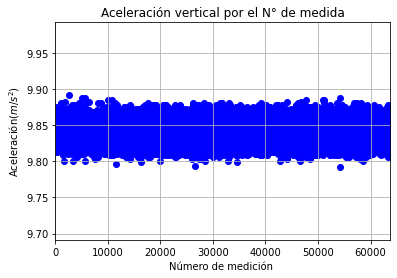

In [176]:
plt.scatter(N_med,a_z,c="blue")
plt.grid(True)
plt.xlabel('Número de medición ')
plt.ylabel('Aceleración($m/s^2$)')
plt.xlim(0,len(N_med)+1)
plt.ylim(l,L)
plt.title('Aceleración vertical por el N° de medida')

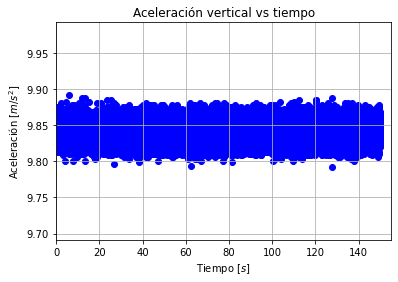

In [177]:
plt.scatter(T,a_z,c="blue")
plt.xlim(0,155)
plt.ylabel('Aceleración $[m/s^2]$')
plt.xlabel('Tiempo $[s]$ ')
plt.xlim(0,155)
plt.ylim(l,L)
plt.title('Aceleración vertical vs tiempo')
plt.grid(True)

# C. Calcule el valor medio y la desviación estándar de sus datos.



### El promedio de cada tiempo se calcula como : 
\begin{equation}
\bar{a} =  \frac{1}{N}\sum_{i=1}^{N} a_{i} \ , \   \   
\end{equation}


In [178]:
valor_medio = np.mean(a_z)
print("El valor medio de los datos es ",valor_medio)

El valor medio de los datos es  9.842434411986961


### Por otro lado, la desviación estandar se calcula como: 
\begin{equation}
s_{a} = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N} (a_{i}- \bar{a})^2}  \ , \   \   j = {1,2}
\end{equation}


In [179]:
desv_standar = np.std(a_z,ddof=1)
print("La desviación estandar de los datos es",desv_standar)

La desviación estandar de los datos es 0.011172288292462088


# D. Confeccione un histograma de sus datos separándolos en 20 "bins". Comente las características que observa en el histograma. ¿Que función cree que podría describir la tendencia general del histograma?

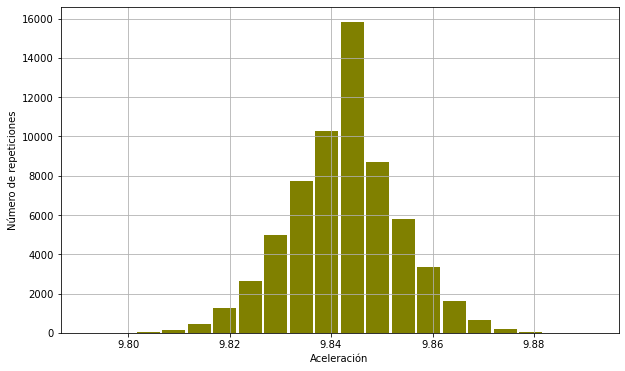

In [450]:
#Histograma
plt.figure(figsize=(10,6))
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='olive')
plt.xlabel('Aceleración')
plt.ylabel('Número de repeticiones')
plt.grid(True)

## Notar que los datos se distribuyen de manera tal manera que es posible describir el histograma mediante la  campana de Gauss o distrubución normal.


\begin{equation}
    y=y_0e^{-\alpha x^2} \Leftrightarrow \ln(y)=\ln(y_0)-\alpha x^2
\end{equation}


# E. Realice un ajuste de los datos del histograma (número de datos en el intervalo correspondiete a c/u de los 20 bins) con la función cometada en el punto anterior.

In [445]:
hist, bin_edges = np.histogram(a_z,bins=20)
bin_size = bin_edges[1]-bin_edges[0] # calculo el ancho de los bins del histograma
N=len(a_z) # número de cuentas

## Ajuste con función norm

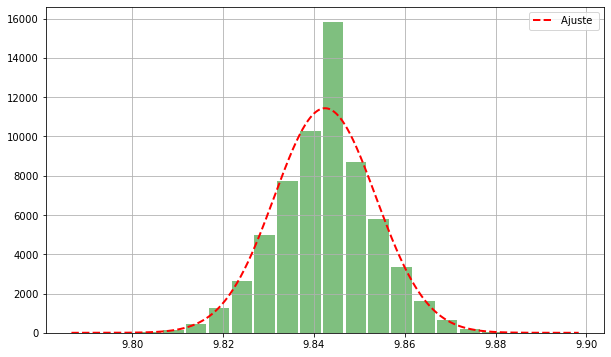

[0.04262169 0.04265514 0.04268861 ... 0.04268861 0.04265514 0.04262169]


In [449]:
mu = np.mean(a_z) #Calcula la media 
sigma =np.std(a_z)
std_err = sigma / N # error estándar
x_gaussiana=np.linspace(mu-5*sigma,mu+5*sigma,num=N) # armo una lista de puntos donde quiero graficar la distribución de ajuste
gaussiana=norm.pdf(x_gaussiana, mu, sigma)*N*bin_size # calculo la gaussiana queplt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='ajuste 1') #grafico la gaussiana corresponde al histograma

plt.figure(figsize=(10,6))
plt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='Ajuste ') #grafico la gaussiana
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='green',alpha = 0.5)
plt.grid(True)
plt.legend()
plt.show()
print(gaussiana)


## Ajuste con curve_fit

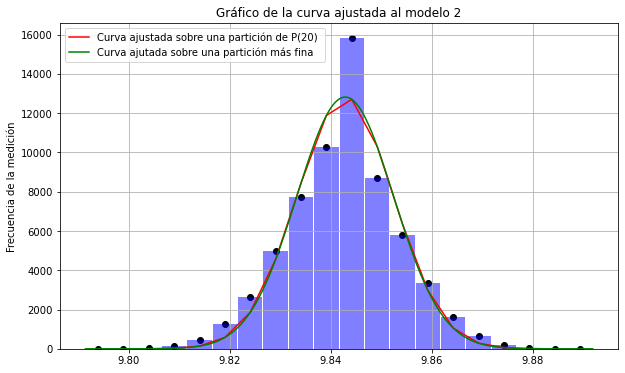

In [543]:
xx = np.linspace(np.min(a_z),np.max(a_z), 2000) 
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2 #(valor del centro de cada "bins")
def gauss(x, *p):
    A, B, C = p
    return (A/x) *np.exp((-(x-B)**2)/(2*(C**2)))

# pk es la estimación inicial de los coeficientes de ajuste (A, B y C)
pk = [0, 1, 2]

#coeff = parámetros óptimos hallados y matrix = es la matriz de covarianza de los parámetros hallados.

coeff,matrix = curve_fit(gauss, bin_centres, hist,pk)
A,B,C = coeff
hist_ajustado = gauss(bin_centres, *coeff)  #curva ajustada

plt.figure(figsize=(10,6))
plt.scatter(bin_centres,hist, color = "black")
#plt.plot(bin_centres, hist,color = "olive")
plt.plot(bin_centres, hist_ajustado, label='Curva ajustada sobre una partición de P(20) ',color = "red")
plt.plot(xx,gauss(xx,*coeff), label='Curva ajutada sobre una partición más fina ',color = "green")
plt.hist(a_z, bins=20, color='blue',alpha=0.5,rwidth=0.96)
plt.title('Gráfico de la curva ajustada al modelo 1')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()
plt.grid(True)

### Curvefit no  funciona correctamente ya que; la fórmula para la covariaza de parámetros  ofrece limitaciones en función de  los grados de libertad, que bajo ciertos parametros iniciales $p_{k}$ se indefine la expresión.

#### Es análogo al problema del cálculo de la varianza.) Que presenta los  grados de libertad en el denominador y estos se calculan como:
N° de puntos de datos - N° de parametros.

(Que es 1-1 = 0.)  

Es por esto que Scipy verifica el número de grados de libertad antes de devidir por 0. 

En este caso la covarianza de los parametros no puede ser estimada, puesto que si la matriz jacobiana en la solución no presenta un rango completo, entonces este método no es capaz de otorgar una matriz de covarianza.

## Es por ello que desarrollamos otro ajuste que no presente este tipo de limitaciones. 

Consideremos la expresión $y = a \cdot e^{-b(x+c)^2}$, que tomando ciertas hipotesis podemos expresar como un polinomio del tipo
\begin{align}
    z &= ln(y) \\
    &= ln(a) -b(x+c)^2\\
    & \Rightarrow z = \alpha x^2 + \beta x + \gamma
\end{align}

con $\alpha = -b, \beta = -2bc, \gamma = ln(a)-bc^2$

Text(0, 0.5, 'Logaritmo natural de frecuencia de la medición')

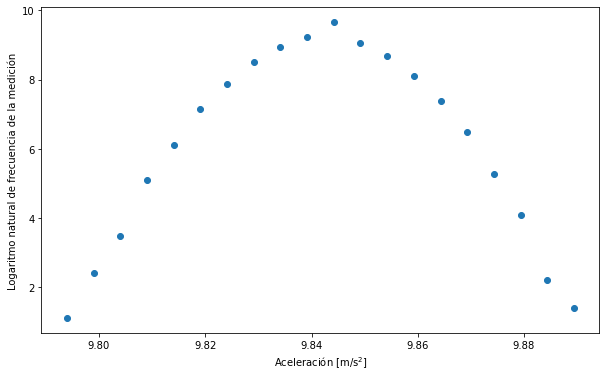

In [531]:
def gauss_2(x, A,B,C):
    return A*np.exp(-B*((x+C)**2)) 
log_hist = np.log(hist) 

plt.figure(figsize=(10,6))
plt.scatter(bin_centres, log_hist)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')

### Observación 1: Gráficamente podemos observar una perdida de suavidad. Esto ya delata futuras limitaciones al momento de buscar funciones que se ajusten a los datos.

Text(0, 0.5, 'Logaritmo natural de frecuencia de la medición')

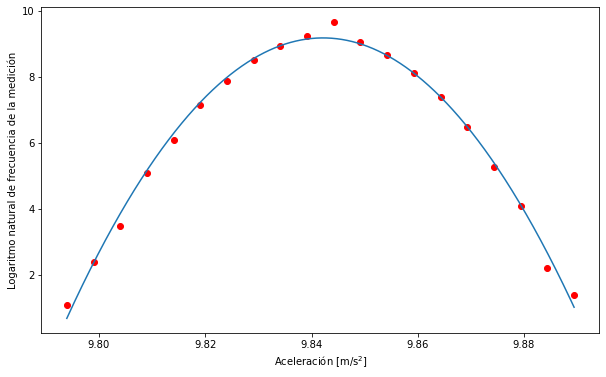

In [532]:
#Ahora el ajuste, a un polinomio de grado 2:
p = np.polyfit(bin_centres,log_hist , 2)
#Evaluamos el polinomio:
x_x = np.linspace(np.min(bin_centres),np.max(bin_centres), 20000)
Pyy = np.polyval(p,x_x)

plt.figure(figsize=(10,6))
plt.scatter(bin_centres, log_hist, c='red')
plt.plot(x_x,Pyy)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')


### Observación 2: El orden del polinomio es provisto por el cálculo presentado en el inicio; sin embargo, es improtante remarcar que al tratarse de un modelo de regresión resulta conveniente trabajar con polinomios de grado bajo ; ya que no buscamos conseguir de una función que  conecte todos los puntos ( este ejercicio es útil para modelos de interpolación), solamente buscamos estudiar el comportamiento de  los datos.

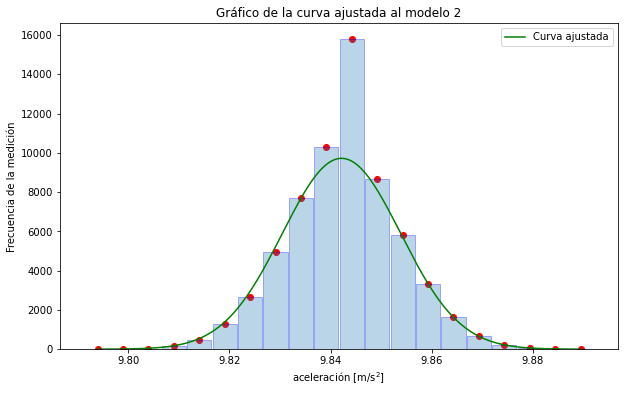

In [542]:
alpha, beta, gamma =p
b = -alpha
c = -beta/(2*b)
a = np.exp(gamma + b*c**2)
y_y = gauss_2(x_x,a,b,c)

plt.figure(figsize=(10,6))
plt.hist(a_z, bins=20, edgecolor='blue', rwidth=0.95, alpha=0.3)
plt.scatter(bin_centres,hist, c='r') 
plt.plot(x_x, y_y, c='green', label='Curva ajustada')
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Frecuencia de la medición')
plt.xlabel('aceleración [m/s$^2$] ')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()

# F: Realice un análisis de los residuos de su ajuste.

Los residuos son la diferenia entre el valor observado  de la respuesta y el valor ajustado por el modelo. Las métricas mas utilizadas para medir la caldiad del ajuste son el error estándar de los residuos y el coefiene de determinación.  El error estándar de los residuos $\epsilon_{res}$  mide la desviación promedio cualquier punto estimado por el modelo respecto de la curva de regresión. 
\begin{equation}
    \epsilon_{res} = \sqrt{ \frac{\sum \left (y_{i}- \hat{y_{i}} \right )^2 }{n-2}}
\end{equation}

El coeficiente de determinación $R^{2}$ describe la proporción de varianza de la viarable respuesta explicada por el modelo y relativa a la varianza total. Su valor está acotado entre 0  1. Al ser adiensional, presenta la ventaja frente al error estándar resitual de ser más fácil de interpetar. 

\begin{equation}
    R^{2}= \frac{SCT-SCE}{SCT}
\end{equation}
Donde $SCT$ es la suma de los cuadrados totales y $SCE$ es la suma de los cuadrados residuales


In [ ]:
#var_res = Sumatoria v(hist[i] - A/bin_centres[i] *np.exp((-(bin_centres[i]-B)**2)/(2*(C**2))))**2
# e_res =np.square(var_res) 

Text(0.5, 1.0, 'Gráfico de residuos')

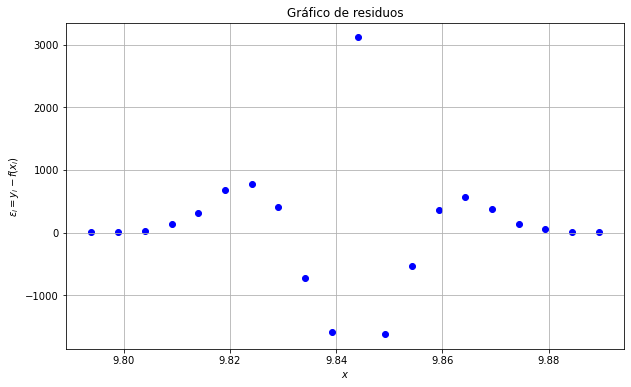

In [538]:


res = hist - gauss(bin_centres,*coeff)

plt.figure(figsize=(10,6))
plt.scatter(bin_centres, res, color='blue')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$\\epsilon_i = y_i -f(x_i)$')
plt.title('Gráfico de residuos 1')

Text(0.5, 1.0, 'Gráfico de residuos 2')

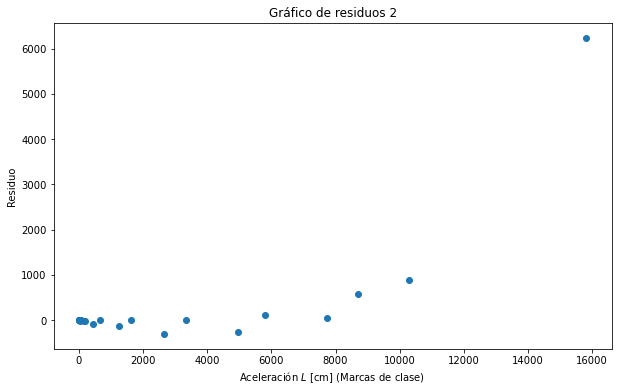

In [540]:
res = (hist - gauss_2(bin_centres,a,b,c))

plt.figure(figsize=(10,6))
plt.scatter(hist, res)
plt.ylabel('Residuo')
plt.xlabel('Aceleración $L$ [cm] (Marcas de clase) ')
plt.title('Gráfico de residuos 2')

## Análisis del coeficiente de determinación $R^{2}$

Matemáticamente se define como $R^{2}= \frac{SCT-SCE}{SCT}  $ 


Es un medida relativa del grado de asociación lineal entre dos variables y representa la proporción de la variaión explicada por la regresión. 

Si $R^{2} \rightarrow 0 \Rightarrow$ Baja capacidad explicativa de la curva ajustada


Si $R^{2} \rightarrow 1 \Rightarrow$ Alta capacidad explicativa de la curva ajustada


In [547]:
SCT = np.sum((hist-np.mean(hist))**2)
SCE = np.sum((hist-gauss(bin_centres,*coeff))**2)
RR= (SCT-SCE)/SCT            
SCT_1 = np.sum((hist-np.mean(hist))**2)
SCE_1 = np.sum((hist-gauss_2(bin_centres,a,b,c))**2)
RR_1= (SCT_1-SCE_1)/SCT_1
print("El coeficinte de determinación para el primer modelo es R^2 =",RR)
print("El coeficinte de determinación para el segundo modelo es R^2= ",RR_1)

El coeficinte de determinación para el primer modelo es R^2 = 0.9523348888083074
El coeficinte de determinación para el segundo modelo es R^2=  0.8909180529834402


### De acuerdo a los criterios previamente enunciados, concluimos que el modelo 1 se aunsta mejor a los datos, pero sujeto a la correcta determinación de parametros iniciales. 



# G. Repita todo el proceso anterior con .....

# Datos medición 2

In [549]:
datos = np.genfromtxt('/home/juangarcia/Escritorio/Tareas Cs. Udec/Tareas S4/Tareas-S4/Laboratorio 1/Tarea 3/Base de datos/Raw_Data2.csv',delimiter=",")
t = datos[:,0] #tiempo con Nan
a = datos[:,3] #aceleración en el eje Z con Nan
p = len(a)
print(p)

63739


Aceleración máxima medida 10.08574772
Aceleración mínima medida 9.499206543


Text(0.5, 1.0, 'Aceleración vertical por el N° de medida')

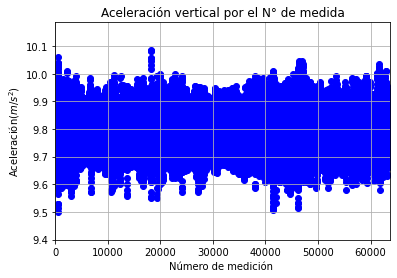

In [550]:
a_z = a[1:p] #aceleración en el eje Z sin Nan
T = t[1:p] #timpo sin Nan
n = len(a_z)
N_med =np.arange(1,n+1) #número de mediciones
print("Aceleración máxima medida",np.amax(a_z))
print("Aceleración mínima medida",np.amin(a_z))
L = np.amax(a_z)+0.1
l = np.amin(a_z)-0.1

plt.scatter(N_med,a_z,c="blue")
plt.grid(True)
plt.xlabel('Número de medición ')
plt.ylabel('Aceleración($m/s^2$)')
plt.xlim(0,len(N_med)+1)
plt.ylim(l,L)
plt.title('Aceleración vertical por el N° de medida')

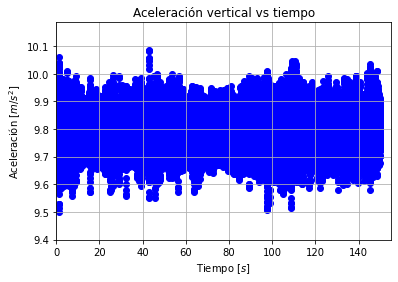

In [551]:
plt.scatter(T,a_z,c="blue")
plt.xlim(0,155)
plt.ylabel('Aceleración $[m/s^2]$')
plt.xlabel('Tiempo $[s]$ ')
plt.xlim(0,155)
plt.ylim(l,L)
plt.title('Aceleración vertical vs tiempo')
plt.grid(True)

In [553]:
valor_medio = np.mean(a_z)
print("El valor medio de los datos es ",valor_medio)
desv_standar = np.std(a_z,ddof=1)
print("La desviación estandar de los datos es",desv_standar)

El valor medio de los datos es  9.805216249977564
La desviación estandar de los datos es 0.0633496880933712


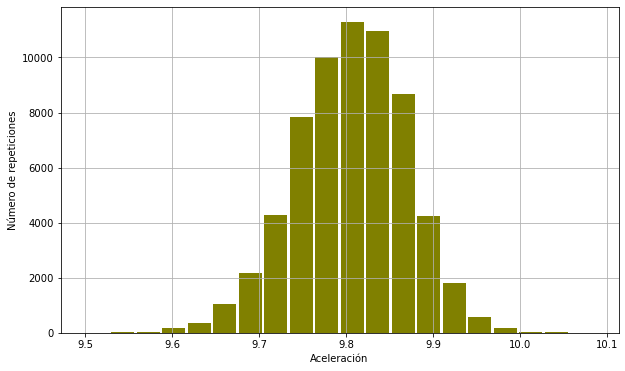

In [554]:
#Histograma
plt.figure(figsize=(10,6))
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='olive')
plt.xlabel('Aceleración')
plt.ylabel('Número de repeticiones')
plt.grid(True)

In [555]:
hist, bin_edges = np.histogram(a_z,bins=20)
bin_size = bin_edges[1]-bin_edges[0] # calculo el ancho de los bins del histograma
N=len(a_z) # número de cuentas

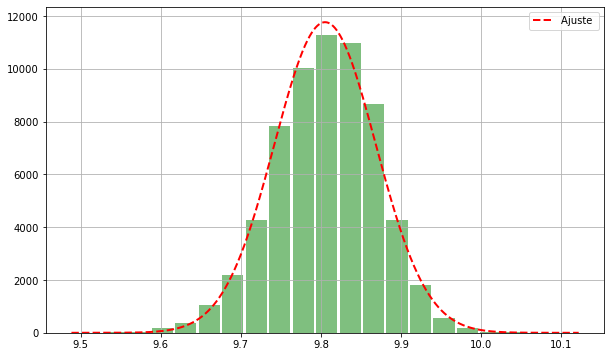

[0.04386871 0.04390314 0.04393759 ... 0.04393759 0.04390314 0.04386871]


In [556]:
mu = np.mean(a_z) #Calcula la media 
sigma =np.std(a_z)
std_err = sigma / N # error estándar
x_gaussiana=np.linspace(mu-5*sigma,mu+5*sigma,num=N) # armo una lista de puntos donde quiero graficar la distribución de ajuste
gaussiana=norm.pdf(x_gaussiana, mu, sigma)*N*bin_size # calculo la gaussiana queplt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='ajuste 1') #grafico la gaussiana corresponde al histograma

plt.figure(figsize=(10,6))
plt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='Ajuste ') #grafico la gaussiana
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='green',alpha = 0.5)
plt.grid(True)
plt.legend()
plt.show()
print(gaussiana)

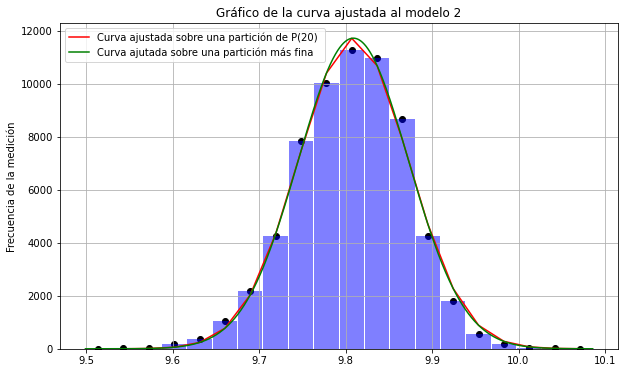

In [557]:
xx = np.linspace(np.min(a_z),np.max(a_z), 2000) 
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2 #(valor del centro de cada "bins")
def gauss(x, *p):
    A, B, C = p
    return (A/x) *np.exp((-(x-B)**2)/(2*(C**2)))

# pk es la estimación inicial de los coeficientes de ajuste (A, B y C)
pk = [0, 1, 2]

#coeff = parámetros óptimos hallados y matrix = es la matriz de covarianza de los parámetros hallados.

coeff,matrix = curve_fit(gauss, bin_centres, hist,pk)
A,B,C = coeff
hist_ajustado = gauss(bin_centres, *coeff)  #curva ajustada

plt.figure(figsize=(10,6))
plt.scatter(bin_centres,hist, color = "black")
#plt.plot(bin_centres, hist,color = "olive")
plt.plot(bin_centres, hist_ajustado, label='Curva ajustada sobre una partición de P(20) ',color = "red")
plt.plot(xx,gauss(xx,*coeff), label='Curva ajutada sobre una partición más fina ',color = "green")
plt.hist(a_z, bins=20, color='blue',alpha=0.5,rwidth=0.96)
plt.title('Gráfico de la curva ajustada al modelo 1')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()
plt.grid(True)

Text(0, 0.5, 'Logaritmo natural de frecuencia de la medición')

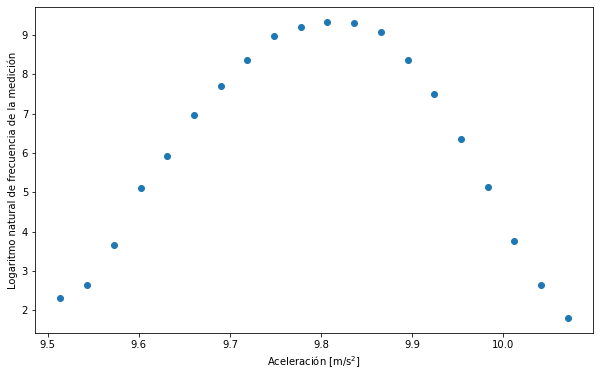

In [558]:
def gauss_2(x, A,B,C):
    return A*np.exp(-B*((x+C)**2)) 
log_hist = np.log(hist) 

plt.figure(figsize=(10,6))
plt.scatter(bin_centres, log_hist)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')

Text(0, 0.5, 'Logaritmo natural de frecuencia de la medición')

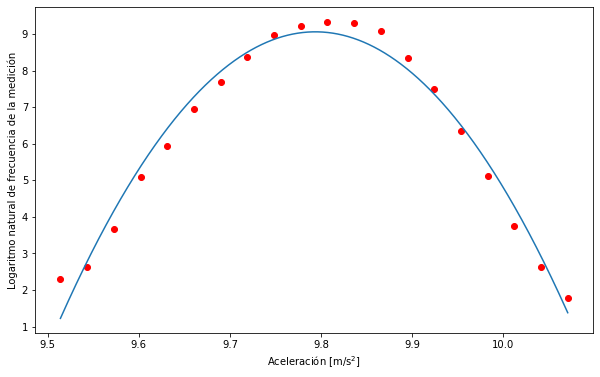

In [559]:
#Ahora el ajuste, a un polinomio de grado 2:
p = np.polyfit(bin_centres,log_hist , 2)
#Evaluamos el polinomio:
x_x = np.linspace(np.min(bin_centres),np.max(bin_centres), 20000)
Pyy = np.polyval(p,x_x)

plt.figure(figsize=(10,6))
plt.scatter(bin_centres, log_hist, c='red')
plt.plot(x_x,Pyy)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')


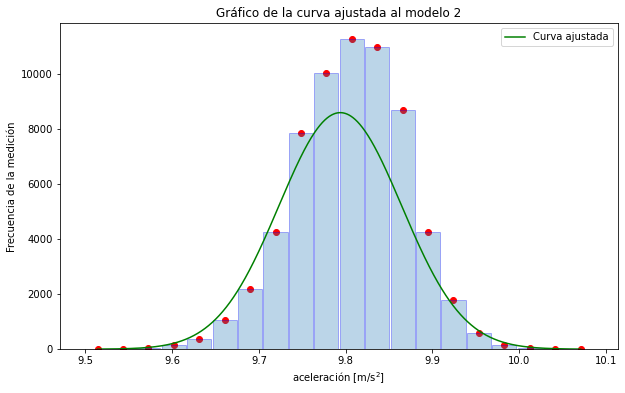

In [560]:
alpha, beta, gamma =p
b = -alpha
c = -beta/(2*b)
a = np.exp(gamma + b*c**2)
y_y = gauss_2(x_x,a,b,c)

plt.figure(figsize=(10,6))
plt.hist(a_z, bins=20, edgecolor='blue', rwidth=0.95, alpha=0.3)
plt.scatter(bin_centres,hist, c='r') 
plt.plot(x_x, y_y, c='green', label='Curva ajustada')
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Frecuencia de la medición')
plt.xlabel('aceleración [m/s$^2$] ')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()

Text(0.5, 1.0, 'Gráfico de residuos 1')

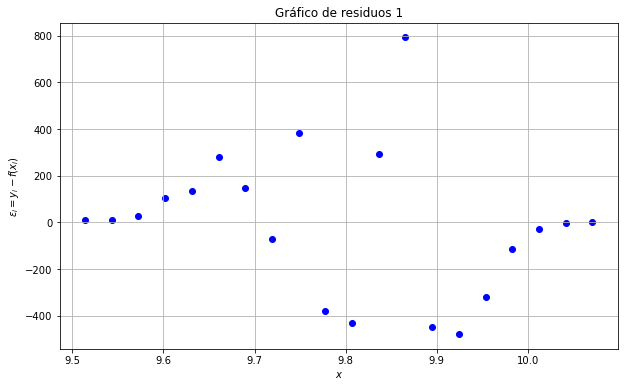

In [561]:
res = hist - gauss(bin_centres,*coeff)

plt.figure(figsize=(10,6))
plt.scatter(bin_centres, res, color='blue')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$\\epsilon_i = y_i -f(x_i)$')
plt.title('Gráfico de residuos 1')

Text(0.5, 1.0, 'Gráfico de residuos 2')

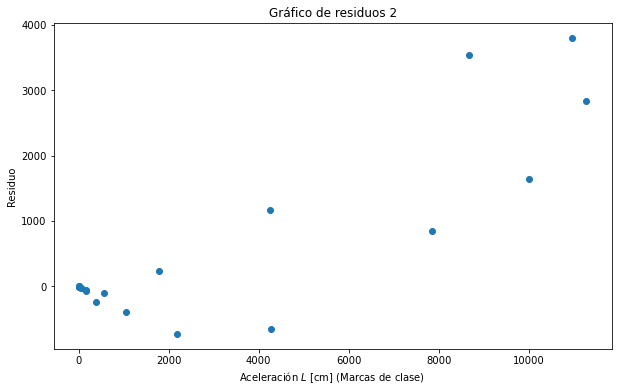

In [562]:
res = (hist - gauss_2(bin_centres,a,b,c))

plt.figure(figsize=(10,6))
plt.scatter(hist, res)
plt.ylabel('Residuo')
plt.xlabel('Aceleración $L$ [cm] (Marcas de clase) ')
plt.title('Gráfico de residuos 2')

In [563]:
SCT = np.sum((hist-np.mean(hist))**2)
SCE = np.sum((hist-gauss(bin_centres,*coeff))**2)
RR= (SCT-SCE)/SCT            
SCT_1 = np.sum((hist-np.mean(hist))**2)
SCE_1 = np.sum((hist-gauss_2(bin_centres,a,b,c))**2)
RR_1= (SCT_1-SCE_1)/SCT_1
print("El coeficinte de determinación para el primer modelo es R^2 =",RR)
print("El coeficinte de determinación para el segundo modelo es R^2= ",RR_1)

El coeficinte de determinación para el primer modelo es R^2 = 0.9943086801655086
El coeficinte de determinación para el segundo modelo es R^2=  0.8742966726597321


### De acuerdo a los criterios previamente enunciados, concluimos que el modelo 1 se aunsta mejor a los datos, pero sujeto a la correcta determinación de parametros iniciales. 

# Datos medición 3

In [567]:
datos = np.genfromtxt('/home/juangarcia/Escritorio/Tareas Cs. Udec/Tareas S4/Tareas-S4/Laboratorio 1/Tarea 3/Base de datos/Raw_Data3.csv',delimiter=",")
t = datos[:,0] #tiempo con Nan
a = datos[:,3] #aceleración en el eje Z con Nan
p = len(a)
print(p)

63731


Aceleración máxima medida 9.908679008
Aceleración mínima medida 9.781859398


Text(0.5, 1.0, 'Aceleración vertical por el N° de medida')

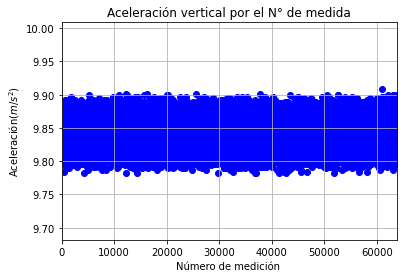

In [568]:
a_z = a[1:p] #aceleración en el eje Z sin Nan
T = t[1:p] #timpo sin Nan
n = len(a_z)
N_med =np.arange(1,n+1) #número de mediciones
print("Aceleración máxima medida",np.amax(a_z))
print("Aceleración mínima medida",np.amin(a_z))
L = np.amax(a_z)+0.1
l = np.amin(a_z)-0.1

plt.scatter(N_med,a_z,c="blue")
plt.grid(True)
plt.xlabel('Número de medición ')
plt.ylabel('Aceleración($m/s^2$)')
plt.xlim(0,len(N_med)+1)
plt.ylim(l,L)
plt.title('Aceleración vertical por el N° de medida')

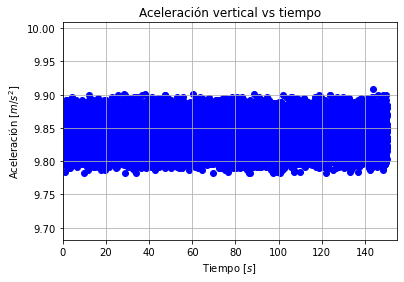

In [569]:
plt.scatter(T,a_z,c="blue")
plt.xlim(0,155)
plt.ylabel('Aceleración $[m/s^2]$')
plt.xlabel('Tiempo $[s]$ ')
plt.xlim(0,155)
plt.ylim(l,L)
plt.title('Aceleración vertical vs tiempo')
plt.grid(True)

In [570]:
valor_medio = np.mean(a_z)
print("El valor medio de los datos es ",valor_medio)
desv_standar = np.std(a_z,ddof=1)
print("La desviación estandar de los datos es",desv_standar)

El valor medio de los datos es  9.842336303145599
La desviación estandar de los datos es 0.01985125387917876


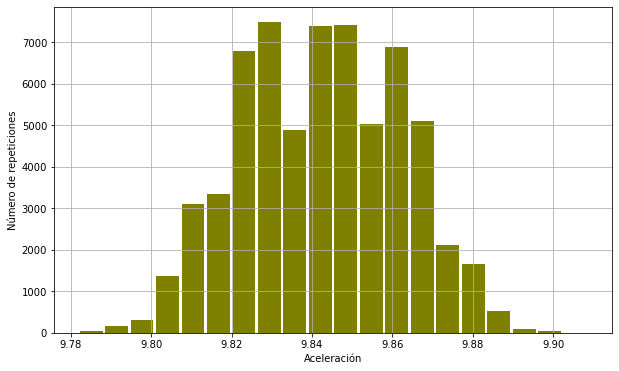

In [571]:
#Histograma
plt.figure(figsize=(10,6))
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='olive')
plt.xlabel('Aceleración')
plt.ylabel('Número de repeticiones')
plt.grid(True)

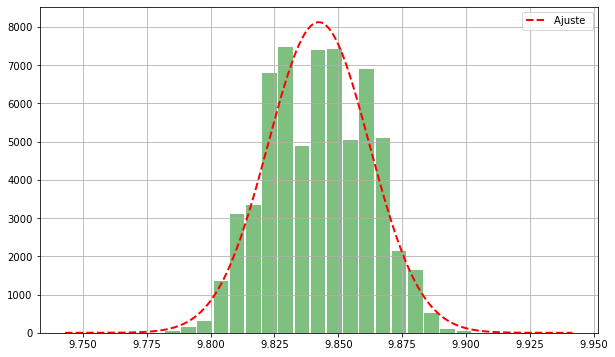

[0.03026529 0.03028904 0.03031282 ... 0.03031282 0.03028904 0.03026529]


In [572]:
hist, bin_edges = np.histogram(a_z,bins=20)
bin_size = bin_edges[1]-bin_edges[0] # calculo el ancho de los bins del histograma
N=len(a_z) # número de cuentas

mu = np.mean(a_z) #Calcula la media 
sigma =np.std(a_z)
std_err = sigma / N # error estándar
x_gaussiana=np.linspace(mu-5*sigma,mu+5*sigma,num=N) # armo una lista de puntos donde quiero graficar la distribución de ajuste
gaussiana=norm.pdf(x_gaussiana, mu, sigma)*N*bin_size # calculo la gaussiana queplt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='ajuste 1') #grafico la gaussiana corresponde al histograma

plt.figure(figsize=(10,6))
plt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='Ajuste ') #grafico la gaussiana
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='green',alpha = 0.5)
plt.grid(True)
plt.legend()
plt.show()
print(gaussiana)

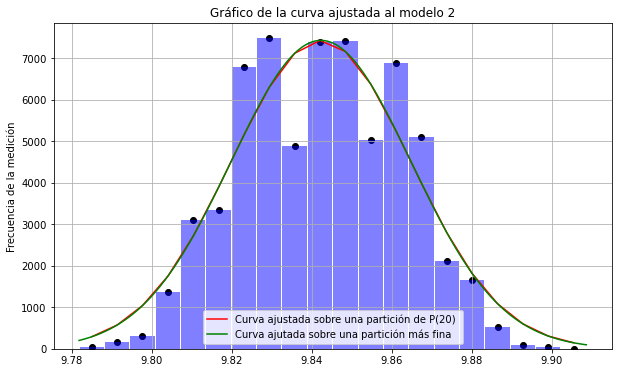

In [573]:
xx = np.linspace(np.min(a_z),np.max(a_z), 2000) 
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2 #(valor del centro de cada "bins")
def gauss(x, *p):
    A, B, C = p
    return (A/x) *np.exp((-(x-B)**2)/(2*(C**2)))

# pk es la estimación inicial de los coeficientes de ajuste (A, B y C)
pk = [0, 1, 2]

#coeff = parámetros óptimos hallados y matrix = es la matriz de covarianza de los parámetros hallados.

coeff,matrix = curve_fit(gauss, bin_centres, hist,pk)
A,B,C = coeff
hist_ajustado = gauss(bin_centres, *coeff)  #curva ajustada

plt.figure(figsize=(10,6))
plt.scatter(bin_centres,hist, color = "black")
#plt.plot(bin_centres, hist,color = "olive")
plt.plot(bin_centres, hist_ajustado, label='Curva ajustada sobre una partición de P(20) ',color = "red")
plt.plot(xx,gauss(xx,*coeff), label='Curva ajutada sobre una partición más fina ',color = "green")
plt.hist(a_z, bins=20, color='blue',alpha=0.5,rwidth=0.96)
plt.title('Gráfico de la curva ajustada al modelo 1')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()
plt.grid(True)

Text(0, 0.5, 'Logaritmo natural de frecuencia de la medición')

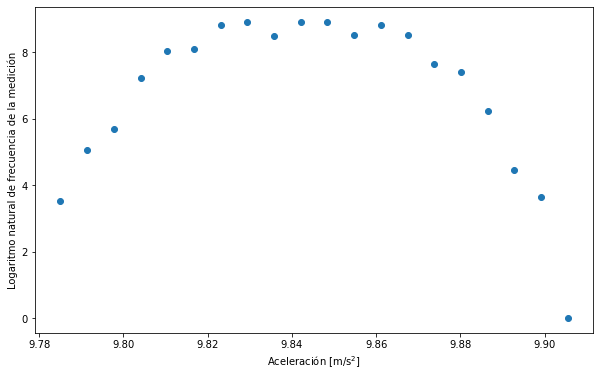

In [574]:
def gauss_2(x, A,B,C):
    return A*np.exp(-B*((x+C)**2)) 
log_hist = np.log(hist) 

plt.figure(figsize=(10,6))
plt.scatter(bin_centres, log_hist)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')

Text(0, 0.5, 'Logaritmo natural de frecuencia de la medición')

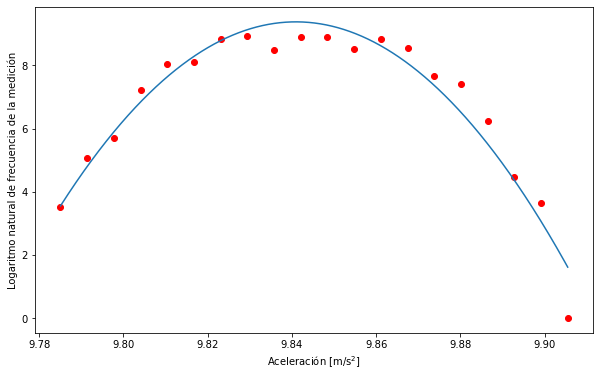

In [575]:
#Ahora el ajuste, a un polinomio de grado 2:
p = np.polyfit(bin_centres,log_hist , 2)
#Evaluamos el polinomio:
x_x = np.linspace(np.min(bin_centres),np.max(bin_centres), 20000)
Pyy = np.polyval(p,x_x)

plt.figure(figsize=(10,6))
plt.scatter(bin_centres, log_hist, c='red')
plt.plot(x_x,Pyy)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')


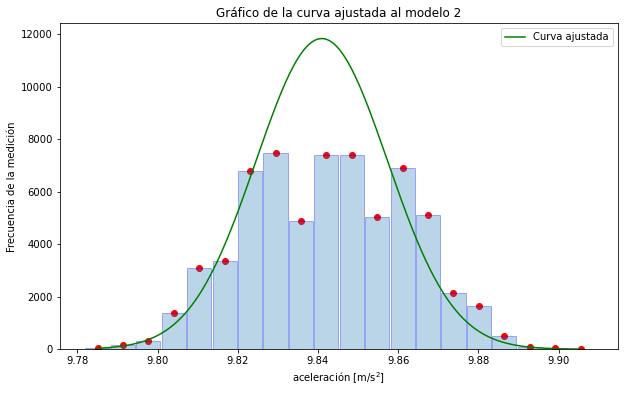

In [576]:
alpha, beta, gamma =p
b = -alpha
c = -beta/(2*b)
a = np.exp(gamma + b*c**2)
y_y = gauss_2(x_x,a,b,c)

plt.figure(figsize=(10,6))
plt.hist(a_z, bins=20, edgecolor='blue', rwidth=0.95, alpha=0.3)
plt.scatter(bin_centres,hist, c='r') 
plt.plot(x_x, y_y, c='green', label='Curva ajustada')
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Frecuencia de la medición')
plt.xlabel('aceleración [m/s$^2$] ')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()

Text(0.5, 1.0, 'Gráfico de residuos 1')

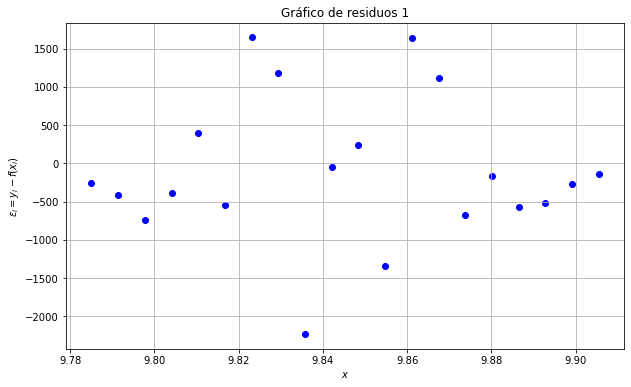

In [578]:
res = hist - gauss(bin_centres,*coeff)

plt.figure(figsize=(10,6))
plt.scatter(bin_centres, res, color='blue')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$\\epsilon_i = y_i -f(x_i)$')
plt.title('Gráfico de residuos 1')

Text(0.5, 1.0, 'Gráfico de residuos 2')

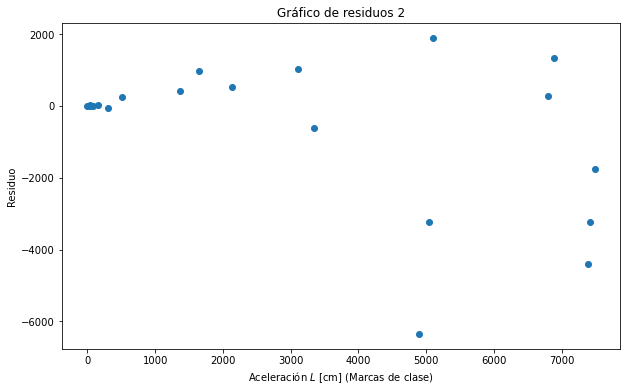

In [579]:
res = (hist - gauss_2(bin_centres,a,b,c))

plt.figure(figsize=(10,6))
plt.scatter(hist, res)
plt.ylabel('Residuo')
plt.xlabel('Aceleración $L$ [cm] (Marcas de clase) ')
plt.title('Gráfico de residuos 2')

In [582]:
CT = np.sum((hist-np.mean(hist))**2)
SCE = np.sum((hist-gauss(bin_centres,*coeff))**2)
RR= (SCT-SCE)/SCT            
SCT_1 = np.sum((hist-np.mean(hist))**2)
SCE_1 = np.sum((hist-gauss_2(bin_centres,a,b,c))**2)
RR_1= (SCT_1-SCE_1)/SCT_1
print("El coeficinte de determinación para el primer modelo es R^2 =",RR)
print("El coeficinte de determinación para el segundo modelo es R^2= ",RR_1)

El coeficinte de determinación para el primer modelo es R^2 = 0.9468289407878683
El coeficinte de determinación para el segundo modelo es R^2=  0.42885997829235795
